In [72]:
from dsc2024 import datasets
from dsc2024 import images
import cv2
from PIL import Image

In [59]:
df = datasets.get_public_dataset(expand_metar_and_metaf=False)

In [60]:
len(df[df.url_img_satelite.isna()])

3733

In [61]:
len(df[df.url_img_satelite.notna()])

298666

In [62]:
len(df.url_img_satelite.unique())

8465

In [63]:
url_espera = df[df.espera == 1].url_img_satelite.iloc[1]
url_sem_espera = df[df.espera == 0].url_img_satelite.iloc[1]

In [64]:
target_icao = "SBSJ"
target_range_area = 500

In [73]:
img_espera = images.download_image_and_cropit(url_espera, target_icao, target_range_area)
img_sem_espera = images.download_image_and_cropit(url_sem_espera, target_icao, target_range_area)

img_espera = Image.fromarray(cv2.cvtColor(img_espera, cv2.COLOR_BGR2RGB))  # Ensure correct color conversion
img_sem_espera = Image.fromarray(cv2.cvtColor(img_sem_espera, cv2.COLOR_BGR2RGB))  # Ensure correct color conversion

In [74]:
def test_image_type(image, location):
    if isinstance(image, np.ndarray):
        print(f"The image is a numpy.ndarray at {location}")
    elif isinstance(image, Image.Image):
        print(f"The image is a PIL.Image at {location}")
    else:
        print(f"Unknown image type at {location}")
        
test_image_type(img_espera, "image-analysis.ipynb")

The image is a PIL.Image at image-analysis.ipynb


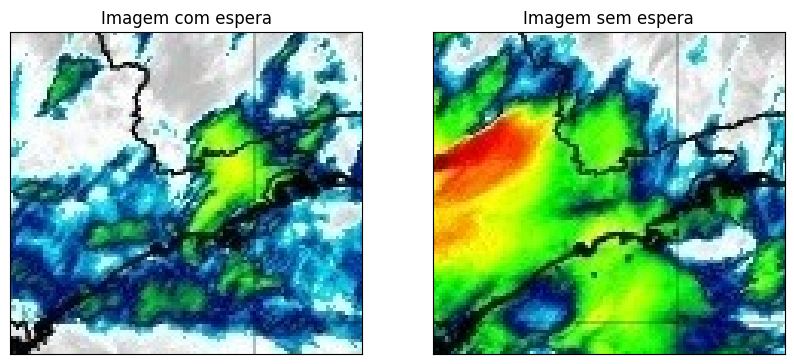

In [75]:
from matplotlib import pyplot as plt
# Create a figure and axes with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image on the first subplot
axes[0].imshow(img_espera)
axes[0].set_title('Imagem com espera')

# Display the second image on the second subplot
axes[1].imshow(img_sem_espera)
axes[1].set_title('Imagem sem espera')

# Hide the axes ticks
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

# Show the plot
plt.show()

In [76]:
from dsc2024 import features

In [77]:
preprocessor, vit = features.load_transformer_feature_extractor()
v_espera = features.feature_extraction_from_image(img_espera, preprocessor, vit)
v_sem_espera = features.feature_extraction_from_image(img_sem_espera, preprocessor, vit)

In [78]:
v_espera.shape

(768,)

In [79]:
v_sem_espera.shape

(768,)

In [80]:
from scipy.spatial.distance import cosine as cosine_distance

# similaridade de cosseno
1 - cosine_distance(v_espera, v_sem_espera)

0.6465723737258251